# Multiple Linear Regression

This notebook makes use of linear regression to predict the price of a house based two variables (sqare feet and number of bedrooms).  
Uses mean squared error as cost function.  
Initializes weight and bias using numpy randn function.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Initialize price, square feet, and number of bedrooms arrays
price = np.array([150, 300, 175, 120, 500, 248, 350, 250, 450]) # Price per 1000
sqr_feet = np.array([1000, 1800, 1200, 1100, 2200, 2000, 1500, 1600, 2300])
num_bedrooms = np.array([1,3,2,1,4,3,2,2,4])

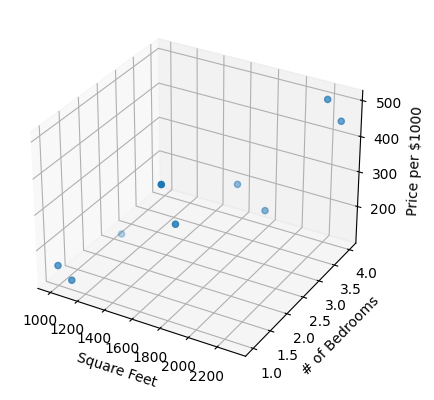

In [24]:
# 3D graph of square feet, number of bedrooms, and price
ax = plt.axes(projection='3d')
ax.set_xlabel('Square Feet')
ax.set_ylabel('# of Bedrooms')
ax.set_zlabel('Price per $1000')
ax.scatter3D(sqr_feet, num_bedrooms, price)
plt.show()

In [25]:
# Scale variables down using using feature scaling
price_scaled = np.array([i/np.max(price) for i in price])
sqrFeet_scaled = np.array([i/np.max(sqr_feet) for i in sqr_feet])
numBedrooms_scaled = np.array([i/np.max(num_bedrooms) for i in num_bedrooms])

In [26]:
# Combine square feet and number of bedrooms into one array
# n by 2 array with each element = [sqrFeet, numOfBedrooms]
a = zip(sqrFeet_scaled, numBedrooms_scaled)
house_features = np.array(list(a))

n,m = np.shape(house_features)

Final Cost 0.007588319947167519
Final Weight: [[1.10723582 0.0181758 ]]
Final Bias: -0.23232672943002938


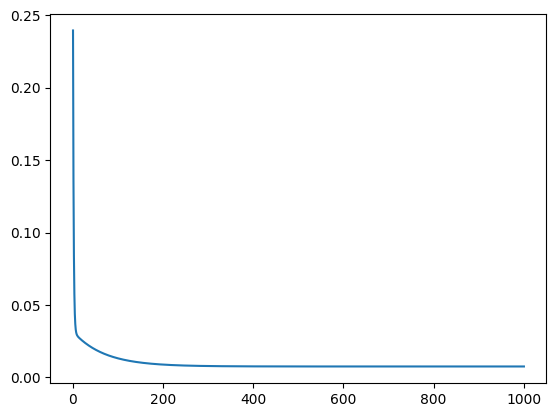

In [35]:
# Initialize weight and bias
weights = np.random.randn(1, m)    # random weights for each feature
bias = np.random.randn()     # random biases for each training house

learning_rate = 0.1 # Used learning rate of 0.1
costs = []

for i in range(1000):
    # Calculate ouput using f = wx + b
    f = np.dot(weights, np.transpose(house_features)) + bias
    
    # Calculate cost at each step using mean sqared error
    cost = (1 / (2*n)) * np.sum((f - price_scaled)**2)
    costs.append(cost)

    # Calulate value of derivative of cost with respect to weights and biases
    delta_weights = (1 / n) * np.sum((f - price_scaled) * np.transpose(house_features))
    delta_bias = (1 / n) * np.sum((f - price_scaled))

    # Change weights and biases simultaneously according to derivatives and learning rate
    weights = weights - learning_rate * delta_weights
    bias = bias - learning_rate * delta_bias
    
# Plot cost over per iteration
plt.plot(np.linspace(1,len(costs), len(costs)), costs)

print(f"Final Cost {min(costs)}")
print(f"Final Weight: {weights}")
print(f"Final Bias: {bias}")

In [36]:
# Get price of house based on any square feet
# Uses prediction made from linear regression model
def get_price(sqrFeet, number_of_bedrooms):
    scaled_price = np.dot(weights, np.array([[sqrFeet/np.max(sqr_feet)],[number_of_bedrooms/np.max(num_bedrooms)]])) + bias
    return np.round(float(scaled_price * np.max(price)), 2)

get_price(1500, 2)

249.44